## Setup: 
Fork git repository and clone: https://github.com/gillespielab/gl-spyglass-tables

Setup conda/mamba environment as specified in https://github.com/LorenFrankLab/spyglass/blob/master/environment.yml

In [4]:
import datajoint as dj
import sys
import os

# Alternatively, uncomment these instead of using a dj_local_conf file
# dj.config['database.host'] = "" # enter datajoint host url
# dj.config['database.user'] = "" # enter datajoint username
# dj.config['database.port'] = 3306
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
dj.config.load("dj_local_conf.json")

from spyglass.common.common_behav import StateScriptFile
from spyglass.common.common_nwbfile import AnalysisNwbfile
from spyglass.common.common_session import Session
from gl_spyglass_tables.trial_info import TrialInfo

In [3]:
TrialInfo.heading

nwb_file_name        : varchar(64)                  # name of the NWB file
epoch                : int                          # the session epoch for this task and apparatus(1 based)
dio_event_name       : varchar(80)                  # the name assigned to this DIO event
---
analysis_file_name   : varchar(64)                  # name of the file
trial_info_object_id : varchar(40)                  # the NWB object ID for loading this object from the file
parser               : varchar(100)                 # type of parser used to interpret statescript log
descriptors=null     : blob                         # global descriptors for task

In [5]:
TrialInfo()

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),dio_event_name the name assigned to this DIO event,analysis_file_name name of the file,trial_info_object_id the NWB object ID for loading this object from the file,parser type of parser used to interpret statescript log,descriptors global descriptors for task
bobrick20231130_.nwb,2,homebeam,bobrick20231130_X29R5UNBCF.nwb,90e02db7-dfa3-4a7c-bf32-cbda91804338,V8_delay,=BLOB=
bobrick20231130_.nwb,4,homebeam,bobrick20231130_U939BH2VQJ.nwb,851760e8-e592-4745-9b0e-86bca742236e,V8_delay,=BLOB=
bobrick20231205_.nwb,2,homebeam,bobrick20231205_PVQ3JABUKH.nwb,4d993195-67de-4cd8-b522-9cd6b74c27f3,V8_delay,=BLOB=
bobrick20231205_.nwb,4,homebeam,bobrick20231205_9VA198E2ZB.nwb,a9c7ce54-b293-4dff-a15d-38defa076d4e,V8_delay,=BLOB=


## Inserting epochs:
`TrialInfo.populate()` parses all StateScriptLog run sessions. Here, we we can also insert epochs from a single animal.

In [7]:
nwb_file_name = "bobrick20231205_.nwb"

In [12]:
TrialInfo.populate(StateScriptFile & {'nwb_file_name' : nwb_file_name})

[09:53:03][INFO] Spyglass: Skipping sleep epoch: bobrick20231201_.nwb, epoch 1


bug trial #0, epoch 2! line 257: index 0 is out of bounds for axis 0 with size 0


[09:53:04][INFO] Spyglass: Writing new NWB file bobrick20231201_4N9UXDG66U.nwb
[09:53:07][INFO] Spyglass: Skipping sleep epoch: bobrick20231201_.nwb, epoch 3
[09:53:08][INFO] Spyglass: Writing new NWB file bobrick20231201_I1E2AV96PN.nwb
[09:53:11][INFO] Spyglass: Skipping sleep epoch: bobrick20231201_.nwb, epoch 5


## Reading the resulting analysis file

In [8]:
# select a specific epoch for the inserted session
restr = {"nwb_file_name": nwb_file_name, "epoch": 2}

In [16]:
# accessing trial descriptors
(TrialInfo & restr).fetch1("descriptors")

{'statescript': 'V8pre_delay_locknoise_uw.sc',
 'lockout_period': 30.0,
 'python_script': 'V8.py',
 'outer_reps': 10,
 'num_goals': 1,
 'forage_num': 1}

In [9]:
# fetching dataframe for the specified run epoch
df = (TrialInfo & restr).fetch1_dataframe()
df

,trial_num,start_time,end_time,leave_home,trial_type,rw_start,rw_end,leave_rw,rw_success,outer_well,goal_well,outer_time,leave_outer,outer_success,lockout_starts,lockout_ends,during_lockout,lockout_type
id,,,,,,,,,,,,,,,,,,
0,1,1.701801e+09,1.701801e+09,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,1.0,0.000000e+00,0.000000e+00,0,[],[],[],0
1,2,1.701801e+09,1.701801e+09,1.701801e+09,1,1.701801e+09,1.701801e+09,1.701801e+09,1,4.0,1.0,1.701801e+09,1.701801e+09,0,[],[],[],0
2,3,1.701801e+09,1.701801e+09,1.701801e+09,1,1.701801e+09,1.701801e+09,1.701801e+09,1,1.0,1.0,1.701801e+09,1.701801e+09,1,[],[],[],0
3,4,1.701801e+09,1.701802e+09,1.701801e+09,2,1.701801e+09,1.701801e+09,1.701801e+09,1,3.0,1.0,1.701801e+09,1.701802e+09,0,[],[],[],0
4,5,1.701802e+09,1.701802e+09,1.701802e+09,2,1.701802e+09,1.701802e+09,1.701802e+09,1,0.0,1.0,0.000000e+00,0.000000e+00,0,[1701801548.7604764],[1701801578.7604764],[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,119,1.701806e+09,1.701806e+09,1.701806e+09,2,1.701806e+09,1.701806e+09,1.701806e+09,1,0.0,0.0,0.000000e+00,0.000000e+00,0,[1701806129.0314765],[1701806159.0314765],"[3, 4, 1]",1
119,120,1.701806e+09,1.701807e+09,1.701806e+09,1,1.701806e+09,1.701806e+09,1.701806e+09,1,0.0,0.0,0.000000e+00,0.000000e+00,0,"[1701806217.4904764, 1701806280.7104764, 17018...","[1701806247.4904764, 1701806310.7104764, 17018...","[2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 11, 1,...",1
120,121,1.701807e+09,1.701807e+09,1.701807e+09,2,1.701807e+09,1.701807e+09,1.701807e+09,1,2.0,0.0,1.701807e+09,1.701807e+09,0,[],[],[],0


In [9]:
# vscode widget: run this cell to get an interactive plot
%matplotlib ipympl

# Uncomment this widget instead for jupyter notebook:
#%matplotlib notebook


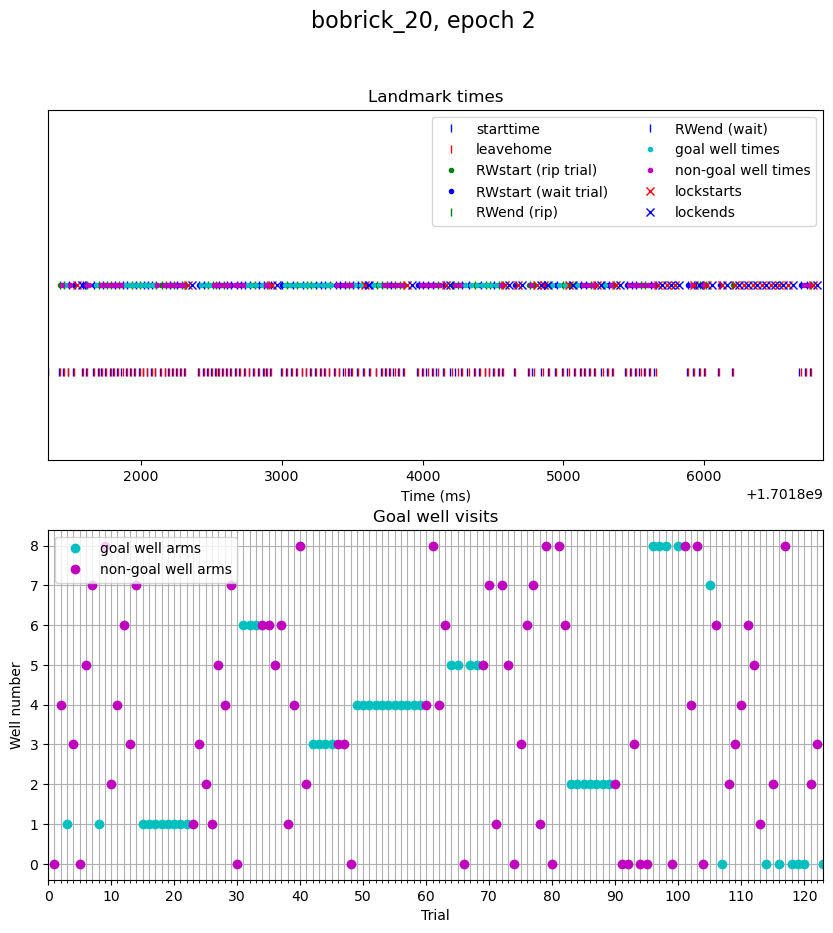

In [10]:
# optional: visualize landmark times during epoch
(TrialInfo & restr).plot_trials()

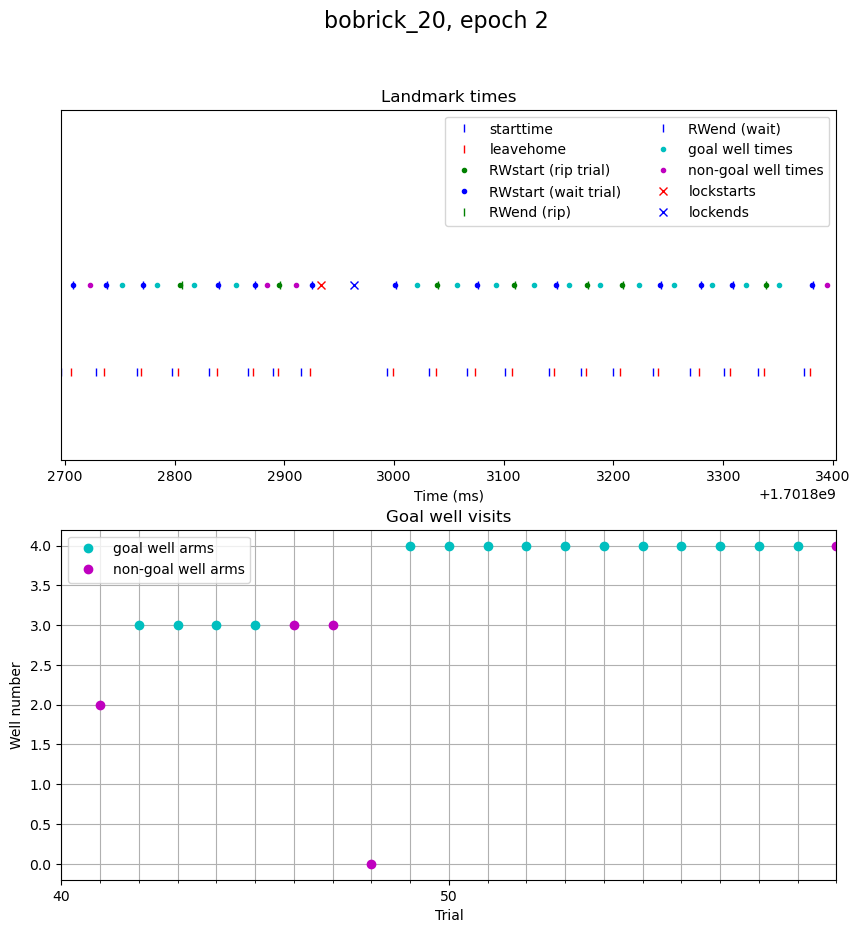

In [11]:
# alternatively, select a smaller interval of trials
(TrialInfo & restr).plot_trials(start=40, end=60)

## Deleting Entries

In [14]:
# Deletes TrialInfo entries from this session
(TrialInfo & {"nwb_file_name" : nwb_file_name}).delete()

[15:46:51][INFO] Spyglass: Building merge cache for __trial_info.
	Found 0 downstream merge tables


[2024-05-22 15:46:51,583][INFO]: Deleting 2 rows from `trial_info`.`__trial_info`
[2024-05-22 15:46:53,661][INFO]: Deletes committed.


In [15]:
TrialInfo & {"nwb_file_name" : nwb_file_name}

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),dio_event_name the name assigned to this DIO event,analysis_file_name name of the file,trial_info_object_id the NWB object ID for loading this object from the file,parser type of parser used to interpret statescript log,descriptors global descriptors for task


In [6]:
# Automatically deletes AnalysisNwbfile entries that are not referenced a downstream table
# AND removes the filepath entries for NWB files that are not in use.
AnalysisNwbfile.nightly_cleanup()

100%|██████████| 4/4 [00:00<00:00, 93.11it/s]
